In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [2]:
import wget

In [3]:
url = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv'

In [4]:
filname = wget.download(url)

100% [..............................................................................] 72629 / 72629

In [5]:
df = pd.read_csv("FuelConsumption.csv")

#take a look at the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [7]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
df.head(9)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,2014,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,2014,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,2014,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267


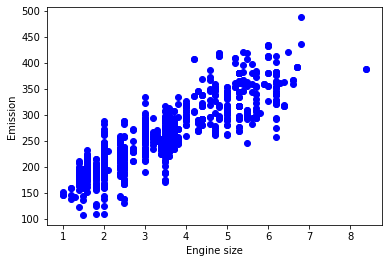

In [8]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color = 'blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

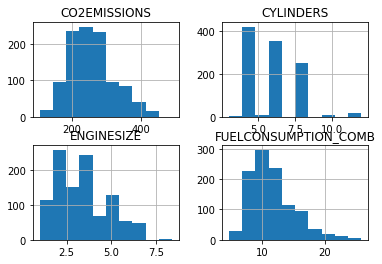

In [9]:
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

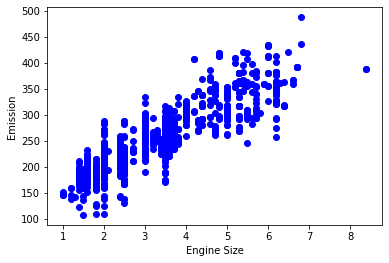

In [10]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color = 'blue')
plt.xlabel("Engine Size")
plt.ylabel("Emission")
plt.show()

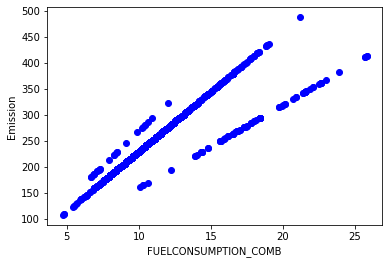

In [11]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

In [15]:
# CREATING TRAIN AND TEST DATASET

msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [14]:
# TRAIN DATA DISTRIBUTION

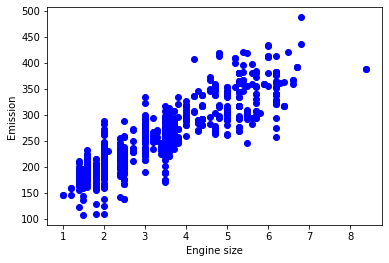

In [16]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color = 'blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [17]:
# MULTIPLE REGRESSION MODEL

In [18]:
from sklearn import linear_model

In [19]:
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE', 'CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
# THE Coefficients
print('Coefficients: ', regr.coef_)

Coefficients:  [[10.24092877  7.79322835  9.69624496]]


In [21]:
# OLS-> (Ordinary Least Squares)
# It is a method for estimating the unknown parameters in a linear regressions model.
# OLS chooses the parameters of a linear function of a set of explanatory variables by minimizing the 
# sum of the squares of the differences between the target dependent variable and those predicted by the linear function.

# OLS can find the best parameters using of the following methods:- 
    # Solving the model parameters analytically using closed-form equations
    # Using an optimiziing algorithm (Gradient Descent, Stochastic Gradient Descent, Newtond's Method, etc.)

In [22]:
y_hat = regr.predict (test[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']])

x = np.asanyarray(test[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])

print("Residual sum of squares: %.2f" % np.mean((y_hat - y)**2))

Residual sum of squares: 658.06


In [23]:
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Variance score: 0.84


In [24]:
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE', 'CYLINDERS','FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(x,y)
print('Coefficients: ',regr.coef_)

Coefficients:  [[10.32482027  7.39062432  6.39064202  2.95682918]]


In [25]:
y_hat = regr.predict (test[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY']])

x = np.asanyarray(test[['ENGINESIZE', 'CYLINDERS','FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY']])
y = np.asanyarray(test[['CO2EMISSIONS']])

print("Residual sum of squares: %.2f" % np.mean((y_hat - y)**2))

Residual sum of squares: 658.59


In [26]:
print('Variance score: %.2f' % regr.score(x,y))

Variance score: 0.84
